# Neural Data Processing Notebook
### Kyle McGraw, February 2025

A notebook to explore a publicly available dataset on [neural population dynamics during reaching](https://dandiarchive.org/dandiset/000070)

In [1]:
# Imports
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np

## Loading the data

In [2]:
# Load an example file to explore
file_path = "data/000070/sub-Jenkins/sub-Jenkins_ses-20090912_behavior+ecephys.nwb"

# Open the NWB file
io = NWBHDF5IO(file_path, mode='r', load_namespaces=True)
example_data = io.read()

example_data

/Users/kylemcgraw/Documents/neural-data-exploration/venv/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/kylemcgraw/Documents/neural-data-exploration/venv/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Data type,float64
Shape,"(4696343, 2)"
Array size,71.66 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(4696343,)"
Array size,35.83 MiB
Chunk shape,None


# Exploring the data

In [3]:
example_data.processing

{'behavior': behavior pynwb.base.ProcessingModule at 0x4563396928
 Fields:
   data_interfaces: {
     Position <class 'pynwb.behavior.Position'>
   }
   description: contains monkey movement data,
 'ecephys': ecephys pynwb.base.ProcessingModule at 0x4563397024
 Fields:
   data_interfaces: {
     Processed <class 'pynwb.ecephys.FilteredEphys'>
   }
   description: Intermediate data from extracellular electrophysiology recordings, e.g., LFP.}

## Behavior Data

In [4]:
behavior_module = example_data.processing["behavior"]
behavior_module

Data type,float64
Shape,"(4696343, 2)"
Array size,71.66 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(4696343,)"
Array size,35.83 MiB
Chunk shape,None


In [5]:
position = behavior_module.get("Position")
position

Data type,float64
Shape,"(4696343, 2)"
Array size,71.66 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(4696343,)"
Array size,35.83 MiB
Chunk shape,None


In [6]:
spatial_series = position.spatial_series["Eye"]
spatial_series

Data type,float64
Shape,"(4696343, 2)"
Array size,71.66 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(4696343,)"
Array size,35.83 MiB
Chunk shape,None


In [7]:
eye_data = spatial_series.data[:]
eye_timestamps = spatial_series.timestamps[:]

print(f"Data shape: {eye_data.shape}")
print(f"Timestamps shape: {eye_timestamps.shape}")

Data shape: (4696343, 2)
Timestamps shape: (4696343,)


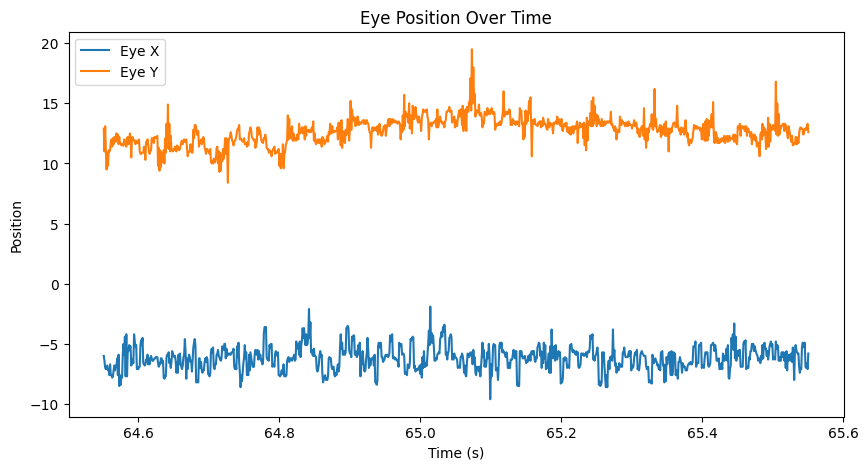

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(eye_timestamps[:1000], eye_data[:1000, 0], label="Eye X")
plt.plot(eye_timestamps[:1000], eye_data[:1000, 1], label="Eye Y")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("Eye Position Over Time")
plt.legend()
plt.show()

## Electrophysiology Data

In [9]:
ecephys_module = example_data.processing["ecephys"]
ecephys_module

ecephys pynwb.base.ProcessingModule at 0x4563397024
Fields:
  data_interfaces: {
    Processed <class 'pynwb.ecephys.FilteredEphys'>
  }
  description: Intermediate data from extracellular electrophysiology recordings, e.g., LFP.

In [10]:
processed = ecephys_module.get("Processed")
processed

Processed pynwb.ecephys.FilteredEphys at 0x4563543712
Fields:
  electrical_series: {
    A001 <class 'pynwb.ecephys.ElectricalSeries'>,
    A002 <class 'pynwb.ecephys.ElectricalSeries'>,
    B001 <class 'pynwb.ecephys.ElectricalSeries'>,
    B002 <class 'pynwb.ecephys.ElectricalSeries'>
  }

In [11]:
electrical_series = processed.electrical_series["A001"]
electrical_series

A001 pynwb.ecephys.ElectricalSeries at 0x4563398320
Fields:
  comments: Generated from SpikeInterface::NwbRecordingExtractor
  conversion: 1e-06
  data: <HDF5 dataset "data": shape (7464590, 96), type "<i2">
  description: LFP signal for array A, segment 1data for both arrays A,B in the same segment should be, but is not of the same time lengthand cannot be synced due to lack of time stamps. Ignore the starting times.
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  rate: 1000.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

In [12]:
a1_data = electrical_series.data[:]
a1_timestamps = electrical_series.starting_time + np.arange(a1_data.shape[0]) / electrical_series.rate

print(f"Data shape: {a1_data.shape}")
print(f"Timestamps shape: {a1_timestamps.shape}")

Data shape: (7464590, 96)
Timestamps shape: (7464590,)


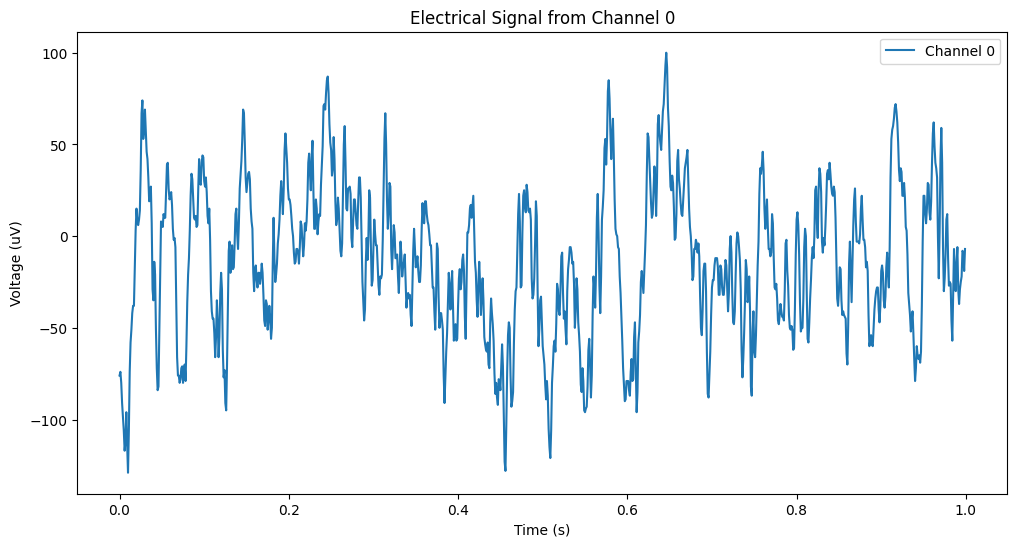

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(a1_timestamps[:1000], a1_data[:1000, 0], label="Channel 0")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title("Electrical Signal from Channel 0")
plt.legend()
plt.show()

## Other Data

In [14]:
trials_df = example_data.trials.to_dataframe()
trials_df.head()

,start_time,stop_time,target_presentation_time,go_cue_time,reaction_time,move_begins_time,move_ends_time,discard_trial,task_success,trial_type,...,correct_reach,maze_num_targets,maze_num_barriers,novel_maze,target_positions,frame_details,hit_target_position,target_size,barrier_info,timeseries
id,,,,,,,,,,,,,,,,,,,,,
0,64.551267,68.191133,65.485267,66.316267,0.310,66.588267,66.903267,0,1,5,...,1,1,0,0,"[[132, 46]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[132, 46]",13,[],"[(0, 3051, Eye pynwb.behavior.SpatialSeries at..."
1,69.186267,72.581167,70.071267,70.701267,0.325,70.988267,71.293267,0,1,7,...,1,1,0,0,"[[0, 86]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-9, 86]",13,[],"[(3051, 2806, Eye pynwb.behavior.SpatialSeries..."
2,73.676400,76.861367,74.623400,74.720400,0.365,75.053400,75.478400,0,1,1,...,1,3,6,0,"[[111, 85], [133, 0], [0, 0]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[111, 85]",13,"[[-69.0, -16.0, 69.0, 13.0], [-120.0, -62.0, 1...","[(5857, 2501, Eye pynwb.behavior.SpatialSeries..."
3,78.511533,81.971467,79.292533,80.106533,0.340,80.413533,80.673533,0,1,0,...,0,1,5,1,"[[0, 0]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-55, -81]",13,"[[141.0, 21.0, 11.0, 41.0], [82.0, 76.0, 40.0,...","[(8358, 2861, Eye pynwb.behavior.SpatialSeries..."
4,82.991300,85.926167,83.677300,84.091300,0.355,84.408300,84.683300,0,1,3,...,1,1,0,0,"[[0, 0]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-116, -5]",13,[],"[(11219, 2391, Eye pynwb.behavior.SpatialSerie..."


In [15]:
trials_df.keys()

Index(['start_time', 'stop_time', 'target_presentation_time', 'go_cue_time',
       'reaction_time', 'move_begins_time', 'move_ends_time', 'discard_trial',
       'task_success', 'trial_type', 'trial_version', 'proto_trial',
       'maze_condition', 'correct_reach', 'maze_num_targets',
       'maze_num_barriers', 'novel_maze', 'target_positions', 'frame_details',
       'hit_target_position', 'target_size', 'barrier_info', 'timeseries'],
      dtype='object')

In [16]:
a1_timestamps[-1]

np.float64(7464.589)

In [17]:
trials_df.iloc[-1]

start_time                                                        8848.290703
stop_time                                                         8852.015637
target_presentation_time                                          8849.177703
go_cue_time                                                       8849.491703
reaction_time                                                           0.465
move_begins_time                                                  8849.917703
move_ends_time                                                    8850.522703
discard_trial                                                               0
task_success                                                                1
trial_type                                                                  5
trial_version                                                               2
proto_trial                                                                 0
maze_condition                                                  

In [18]:
electrodes_df = example_data.electrodes.to_dataframe()
electrodes_df.head()

,x,y,z,imp,location,filtering,group,group_name,gain,offset
id,,,,,,,,,,
1,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...,1,1.0,0.0
2,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...,1,1.0,0.0
3,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...,1,1.0,0.0
4,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...,1,1.0,0.0
5,NaN,NaN,NaN,-1.0,"Pre-Motor Cortex, dorsal",1000Hz,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...,1,1.0,0.0


In [19]:
units_df = example_data.units.to_dataframe()
units_df.head()

,spike_times,obs_intervals,electrodes,electrode_group
id,,,,
0,"[64.68116666666667, 64.8448, 65.02746666666667...","[[64.55126666666666, 68.19113333333334], [69.1...",x y z imp location ...,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...
1,"[4469.972166666666, 4469.983066666667, 4470.03...","[[64.55126666666666, 68.19113333333334], [69.1...",x y z imp location ...,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...
2,"[64.57156666666667, 64.709, 64.73143333333334,...","[[64.55126666666666, 68.19113333333334], [69.1...",x y z imp location ...,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...
3,"[64.55590000000001, 64.5644, 64.58023333333334...","[[64.55126666666666, 68.19113333333334], [69.1...",x y z imp location ...,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...
4,"[64.55216666666666, 64.5821, 64.85373333333334...","[[64.55126666666666, 68.19113333333334], [69.1...",x y z imp location ...,1 pynwb.ecephys.ElectrodeGroup at 0x4563678352...


# Visualizing the data

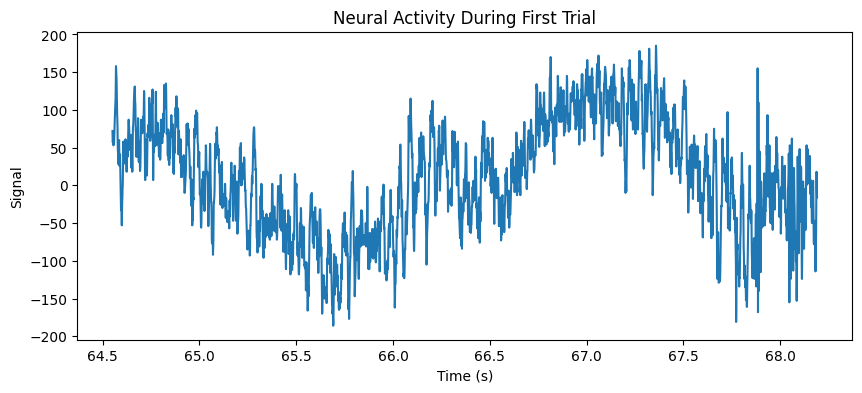

In [34]:
# Plot the first trial
trial_start = int(trials_df.iloc[0]['start_time']*1000) 
trial_end = int(trials_df.iloc[0]['stop_time']*1000)

plt.figure(figsize=(10, 4))
plt.plot(a1_timestamps[trial_start:trial_end], a1_data[trial_start:trial_end, 0].flatten())
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Neural Activity During First Trial')
plt.show()


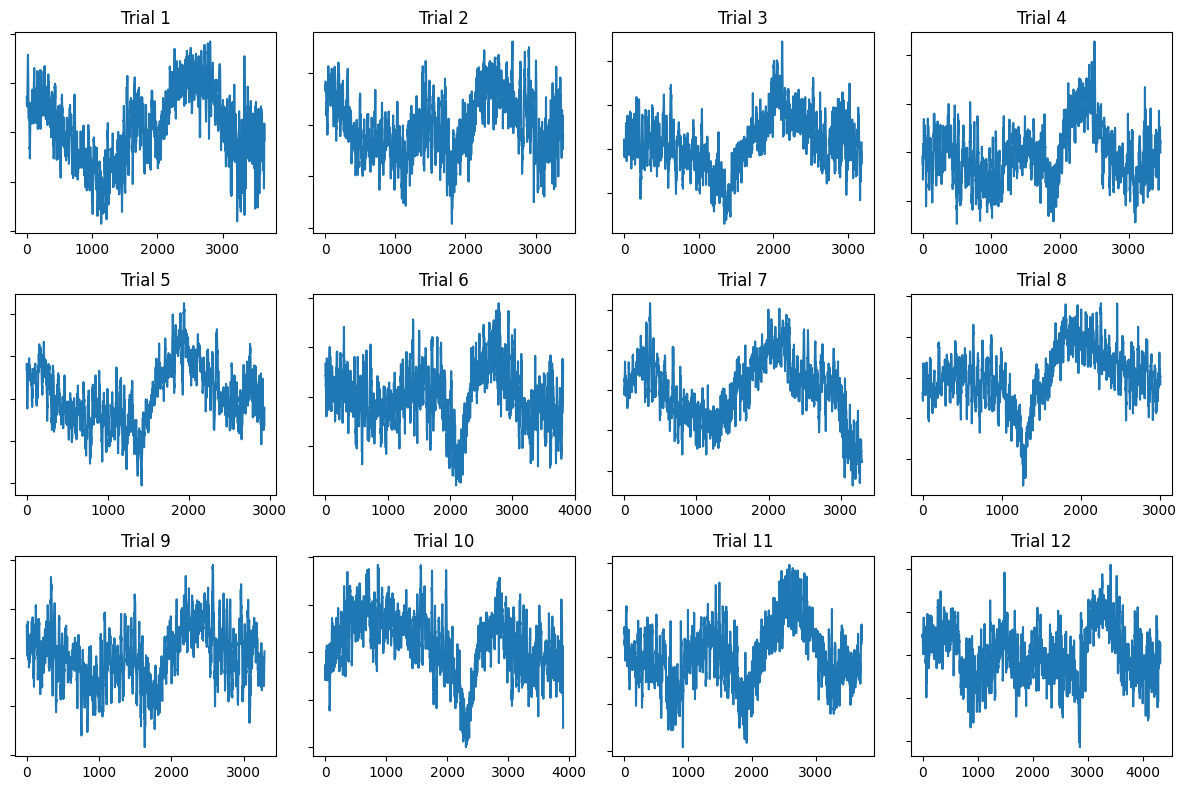

In [49]:
# Plot a few trials from one channel
channel_index = 0
num_trials2plot = 12

fig, axs = plt.subplots(int(np.ceil(num_trials2plot / np.ceil(np.sqrt(num_trials2plot)))), 
                        int(np.ceil(np.sqrt(num_trials2plot))), figsize=(12, 8))
axs = axs.flatten()

for i in range(num_trials2plot):
    trial_start = int(trials_df.iloc[i]['start_time']*1000)
    trial_end = int(trials_df.iloc[i]['stop_time']*1000)
    axs[i].plot(np.arange(len(a1_data[trial_start:trial_end, channel_index])), a1_data[trial_start:trial_end, channel_index])
    axs[i].set_title(f'Trial {i+1}')
    axs[i].set_yticklabels([])
plt.tight_layout()
plt.show()

In [60]:
all_trials = []
max_length = 0
for i in range(len(trials_df)):
    trial_start = int(trials_df.iloc[i]['start_time']*1000)
    trial_end = int(trials_df.iloc[i]['stop_time']*1000)
    trial_data = a1_data[trial_start:trial_end, channel_index]
    all_trials.append(trial_data)
    if len(trial_data) > max_length:
        max_length = len(trial_data)
# Pad each trial to max_length before converting to array
padded_trials = []
for trial in all_trials:
    padded_trial = np.pad(trial, (0, max_length - len(trial)), mode='constant')
    padded_trials.append(padded_trial)
all_trials = np.array(padded_trials)

mean_trial = np.mean(all_trials, axis=0)

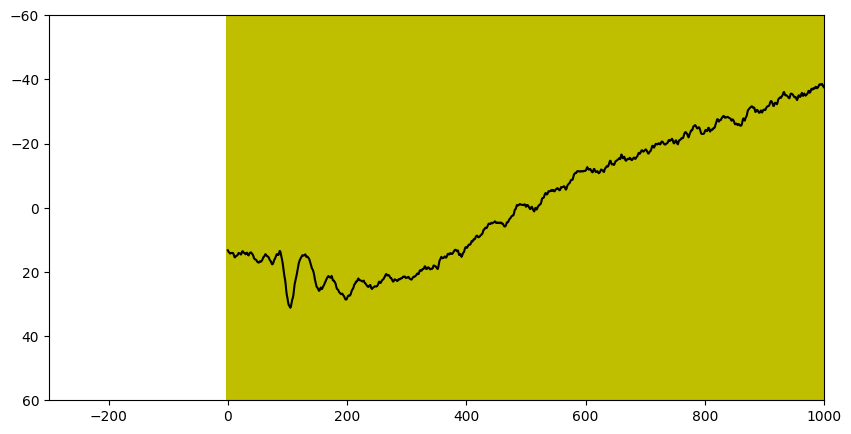

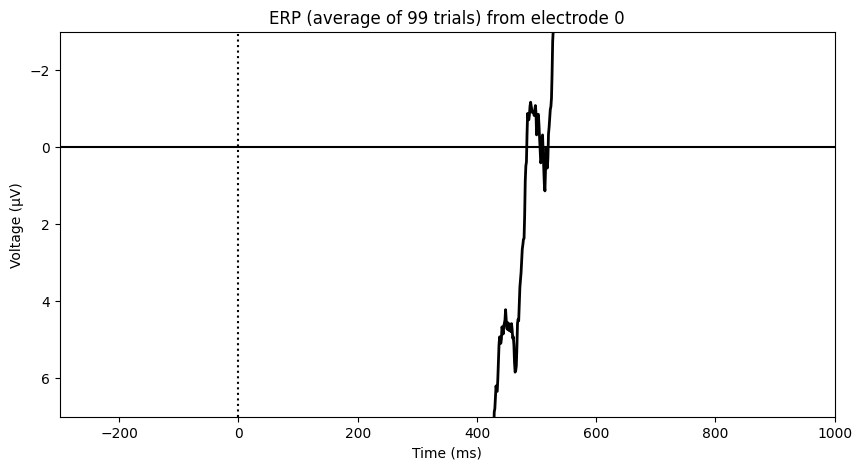

In [62]:

plt.figure(figsize=(10, 5))
# Plot all trials
plt.plot(np.arange(len(all_trials)), all_trials, 'y')
# plot ERP (simply the average time-domain signal)
plt.plot(np.arange(len(all_trials[0])), np.mean(all_trials, axis=0), 'k')
plt.xlim([-300, 1000])
plt.ylim([-60, 60])
plt.gca().invert_yaxis()
plt.show()

# Plot ERP (Event-Related Potential)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(all_trials[0])), np.mean(all_trials, axis=0), 'k', linewidth=2)
plt.axhline(0, color='k')
plt.axvline(0, color='k', linestyle=':')
plt.xlim([-300, 1000])
plt.ylim([-3, 7])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (μV)')
plt.title(f'ERP (average of 99 trials) from electrode {channel_index}')
plt.gca().invert_yaxis()
plt.show()

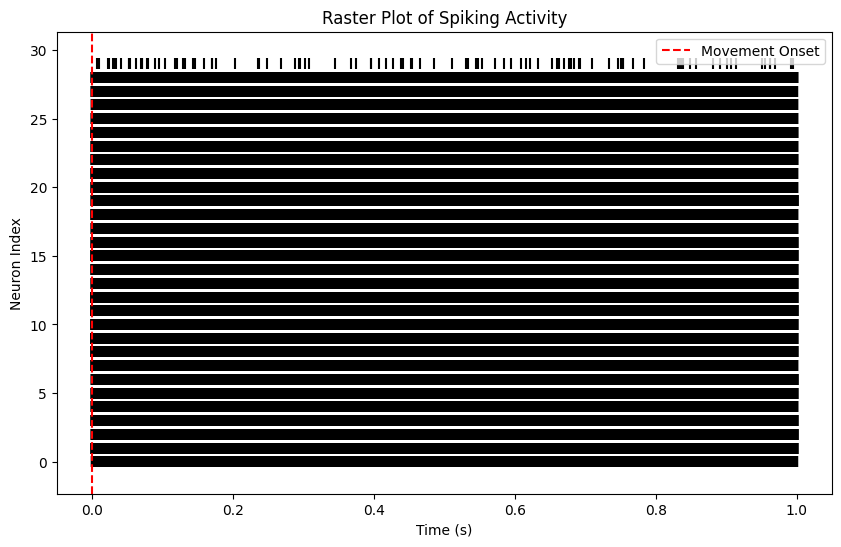

In [20]:
plt.figure(figsize=(10, 6))
window=[-0.5, 1.0]
for i in range(30):  # Plot first 30 neurons
    spike_times = units_df.iloc[i]['spike_times']  # Spike times for this unit

    # Align spikes to trial starts
    aligned_spikes = []
    trial_start_times = trials_df['start_time']
    for start in trial_start_times:
        aligned_spikes.extend(spike_times[(spike_times >= start + window[0]) & (spike_times <= start + window[1])] - start)
    
    plt.eventplot(aligned_spikes, lineoffsets=i, linelengths=0.8, color='black')

plt.axvline(0, color='red', linestyle='--', label="Movement Onset")
plt.xlabel("Time (s)")
plt.ylabel("Neuron Index")
plt.title("Raster Plot of Spiking Activity")
plt.legend()
plt.show()

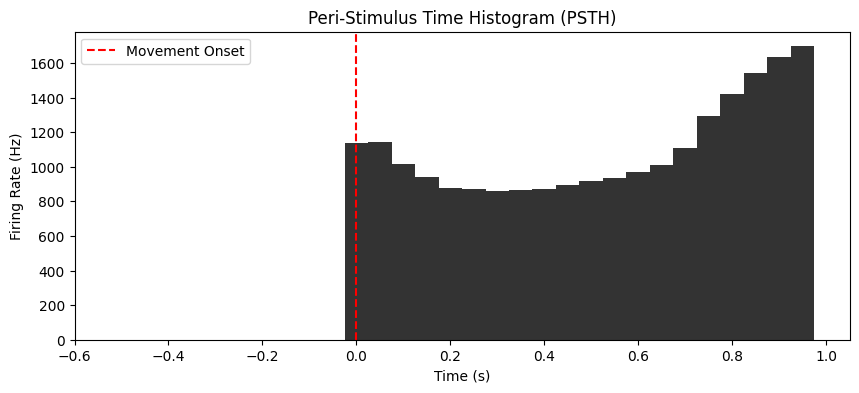

In [21]:
bin_size = 0.05
bins = np.arange(window[0], window[1] + bin_size, bin_size)
psth = np.zeros(len(bins) - 1)

for unit_id in range(30):  # First 30 neurons
    spike_times = units_df.iloc[unit_id]['spike_times']
    for start in trial_start_times:
        aligned_spikes = spike_times[(spike_times >= start + window[0]) & (spike_times <= start + window[1])] - start
        psth += np.histogram(aligned_spikes, bins=bins)[0]

psth /= (len(trial_start_times) * bin_size)  # Normalize to get firing rate

plt.figure(figsize=(10, 4))
plt.bar(bins[:-1], psth, width=bin_size, color="black", alpha=0.8)
plt.axvline(0, color='red', linestyle='--', label="Movement Onset")
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Peri-Stimulus Time Histogram (PSTH)")
plt.legend()
plt.show()

1


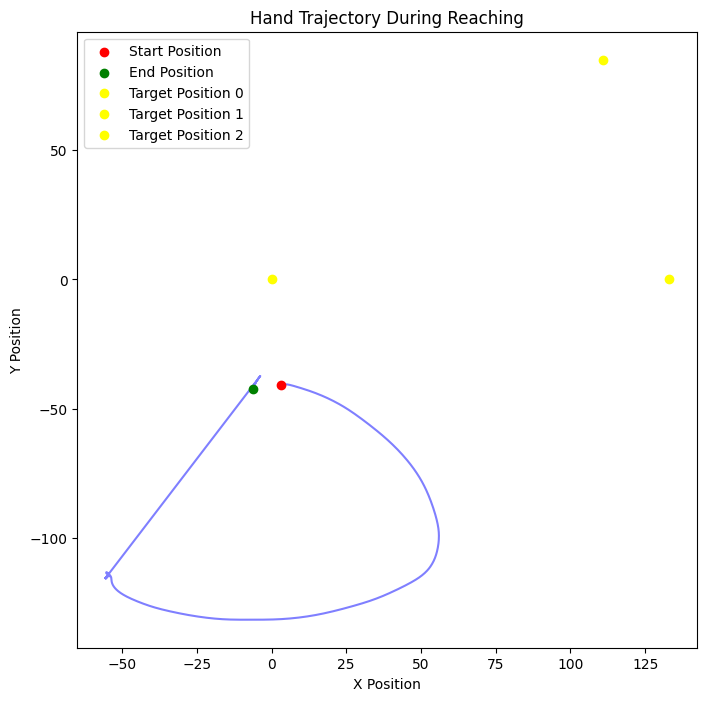

In [22]:
position_data = position.spatial_series["Hand"]

trial_index = 2
trial = trials_df.iloc[trial_index]

trial_start = int(trial['start_time']*1000)
trial_end = int(trial['stop_time']*1000)

hand_x = position_data.data[trial_start:trial_end, 0]  # Extract X position
hand_y = position_data.data[trial_start:trial_end, 1]  # Extract Y position
target_positions = trial['target_positions']
print(trial['correct_reach'])

plt.figure(figsize=(8, 8))
plt.plot(hand_x, hand_y, color='blue', alpha=0.5)
plt.scatter(hand_x[0], hand_y[0], color='red', label="Start Position", zorder=3)
plt.scatter(hand_x[-1], hand_y[-1], color='green', label="End Position", zorder=3)
for i, target_position in enumerate(target_positions):
    plt.scatter(target_position[0], target_position[1], color='yellow', label=f"Target Position {i}", zorder=3)

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Hand Trajectory During Reaching")
plt.legend()
plt.show()

# Signal processing

# Decoding